In [1]:
# ✅ Install (if needed) & Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# To upload file in Colab
from google.colab import files


In [2]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
df = pd.read_csv("diabetes.csv")  # Change name if your file is named differently
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# ✅ Check shape and null values
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# ✅ Data types and summary
print("\nData types:\n", df.dtypes)
df.describe()


Shape of dataset: (768, 9)

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


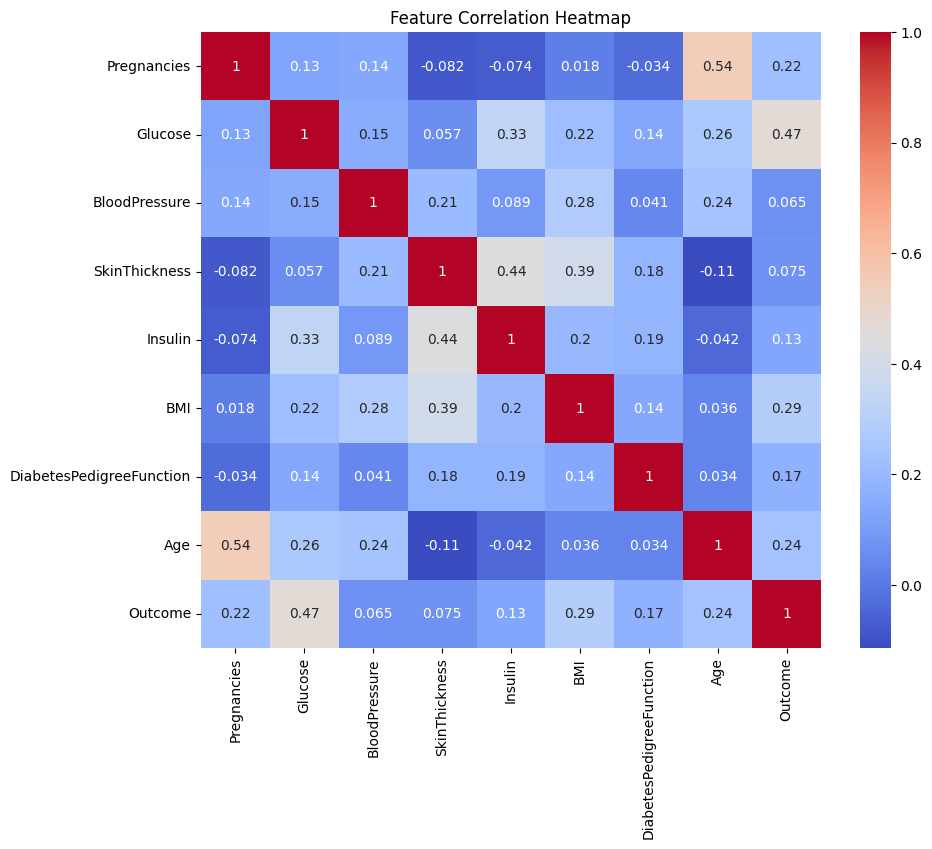

In [5]:
# ✅ Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# ✅ Features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (768, 8)
y shape: (768,)


In [7]:
# ✅ Scale features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# ✅ Split dataset into training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (614, 8)
Testing data shape: (154, 8)


In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Accuracy: 0.7532467532467533
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


🔹 Decision Tree Accuracy: 0.7532467532467533
[[77 22]
 [16 39]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [11]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.7532467532467533
[[78 21]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [12]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 SVM Accuracy: 0.7272727272727273
[[81 18]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


🔹 KNN Accuracy: 0.6883116883116883
[[79 20]
 [28 27]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



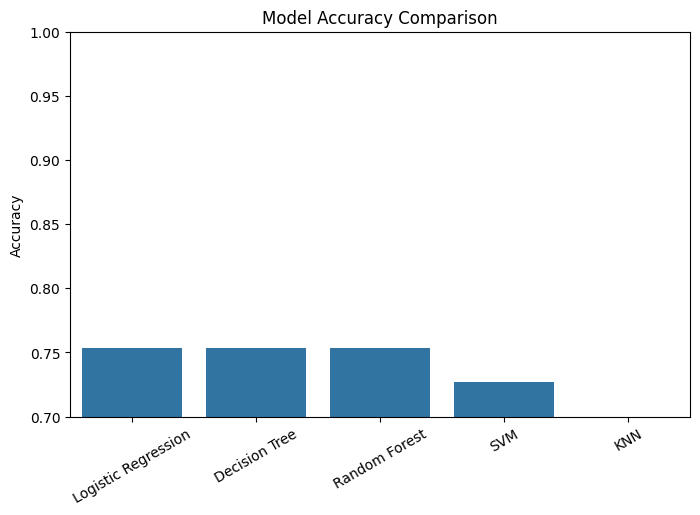

In [14]:
# ✅ Accuracy comparison chart
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn)
}

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.ylim(0.7, 1.0)
plt.show()


In [22]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Split the dataset into train and test
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

==== Logistic Regression ====
Confusion Matrix:
[[79 20]
 [18 37]]


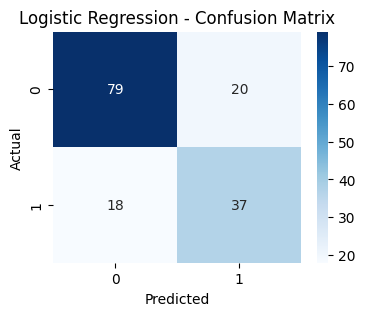

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

==== Decision Tree ====
Confusion Matrix:
[[75 24]
 [15 40]]


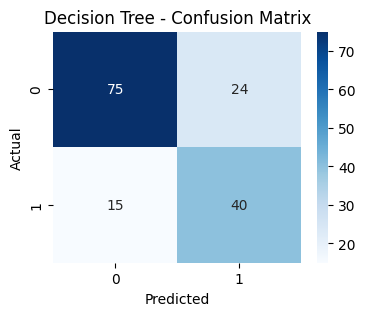

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

==== Random Forest ====
Confusion Matrix:
[[82 17]
 [20 35]]


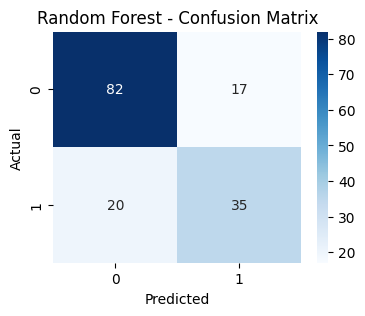

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

==== SVM ====
Confusion Matrix:
[[82 17]
 [24 31]]


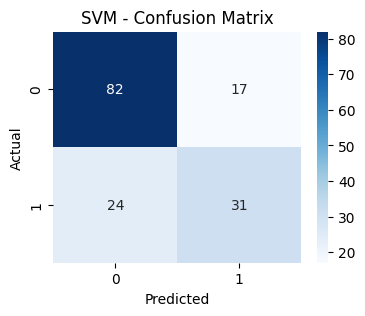

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

==== KNN ====
Confusion Matrix:
[[79 20]
 [27 28]]


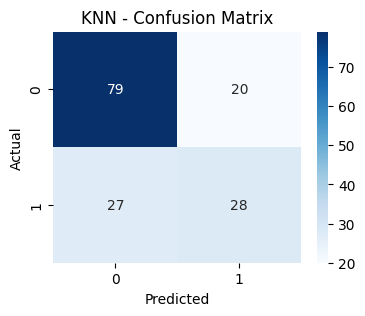

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



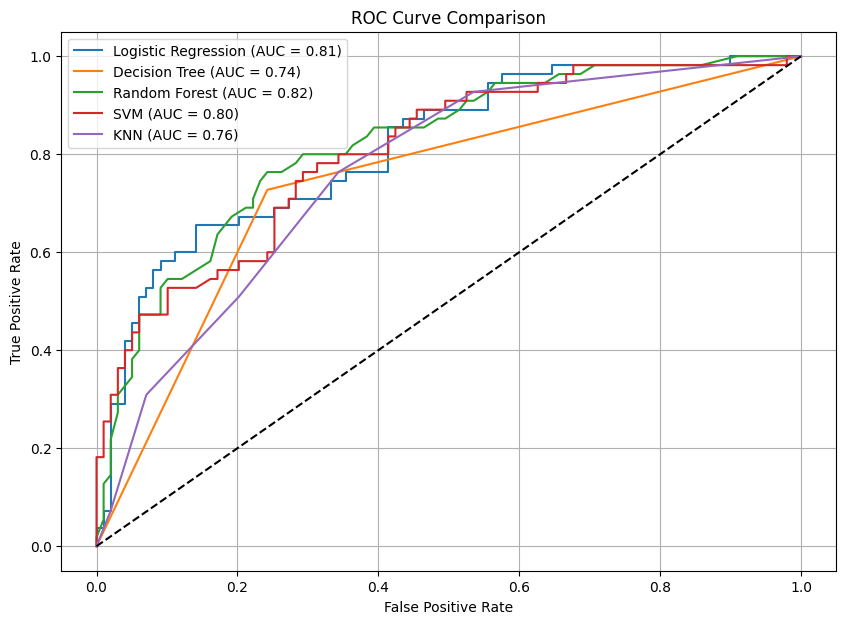

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Put all models into a dictionary
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model
}

# Loop through each model and show confusion matrix + classification report
for name, model in models.items():
    print(f"==== {name} ====")

    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# ROC Curve for all models
plt.figure(figsize=(10, 7))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_scores = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


=== Logistic Regression ===
Confusion Matrix:
[[79 20]
 [18 37]]


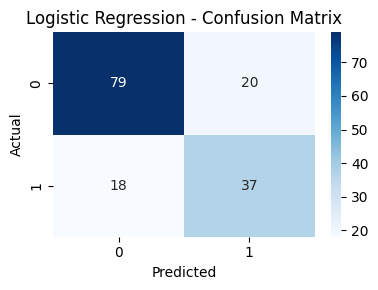

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



=== Decision Tree ===
Confusion Matrix:
[[75 24]
 [15 40]]


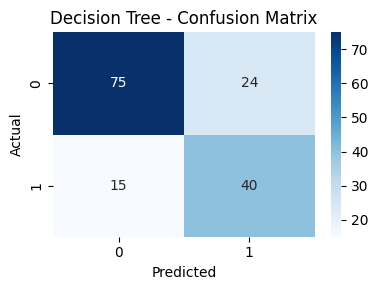

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



=== Random Forest ===
Confusion Matrix:
[[82 17]
 [20 35]]


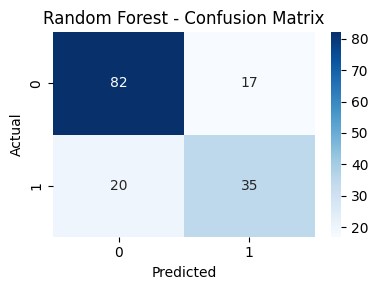

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



=== Support Vector Machine ===
Confusion Matrix:
[[82 17]
 [24 31]]


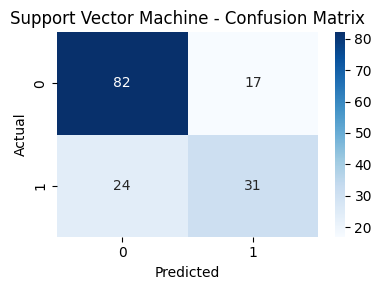

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



=== K-Nearest Neighbors ===
Confusion Matrix:
[[79 20]
 [27 28]]


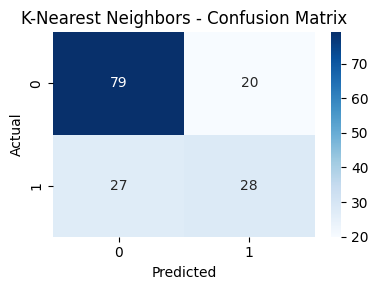

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154





In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Support Vector Machine': svm_model,
    'K-Nearest Neighbors': knn_model
}

# Loop through all models to generate confusion matrix and classification report
for name, model in models.items():
    print(f"=== {name} ===")

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")


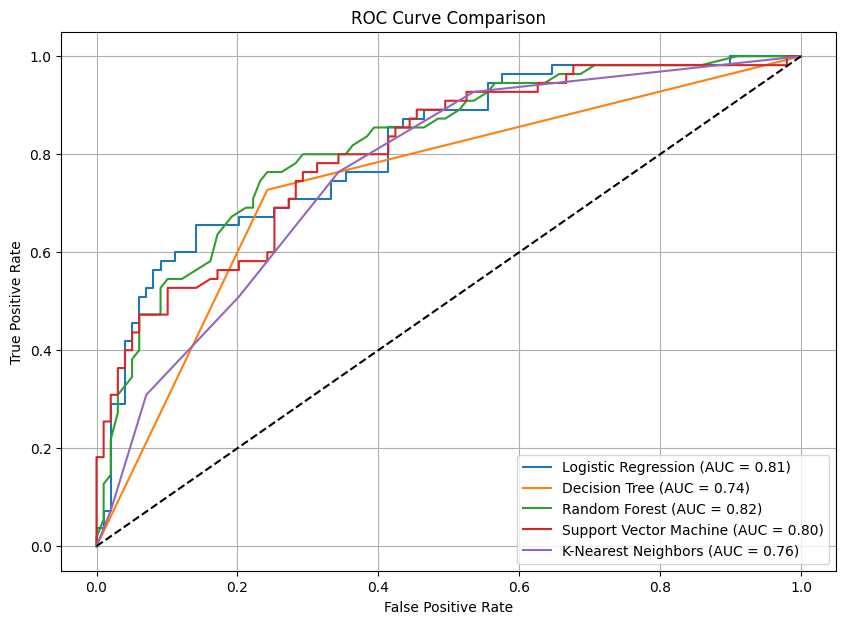

In [26]:
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_scores = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'K-Nearest Neighbors': knn_model
}

print("🔎 Test Accuracy for All Models:\n")
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")


🔎 Test Accuracy for All Models:

Logistic Regression: 0.7532
Decision Tree: 0.7468
Random Forest: 0.7597
SVM: 0.7338
K-Nearest Neighbors: 0.6948


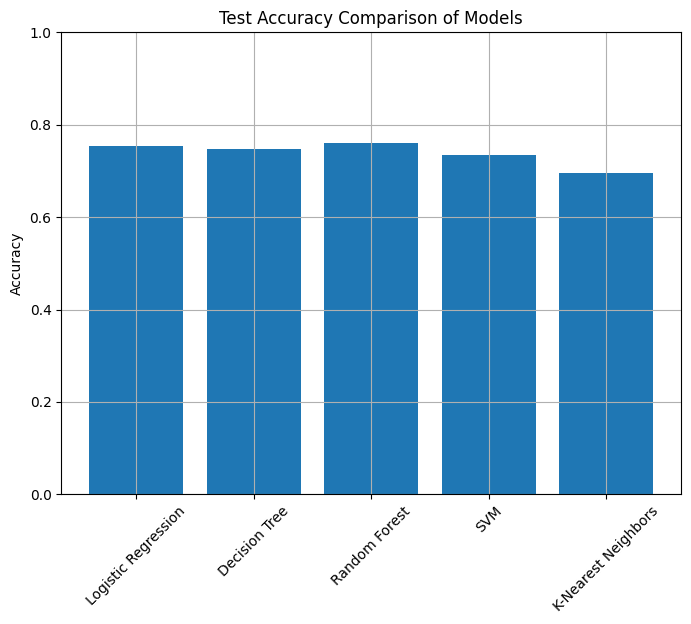

In [28]:
accuracies = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

# Plot
plt.figure(figsize=(8,6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Test Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


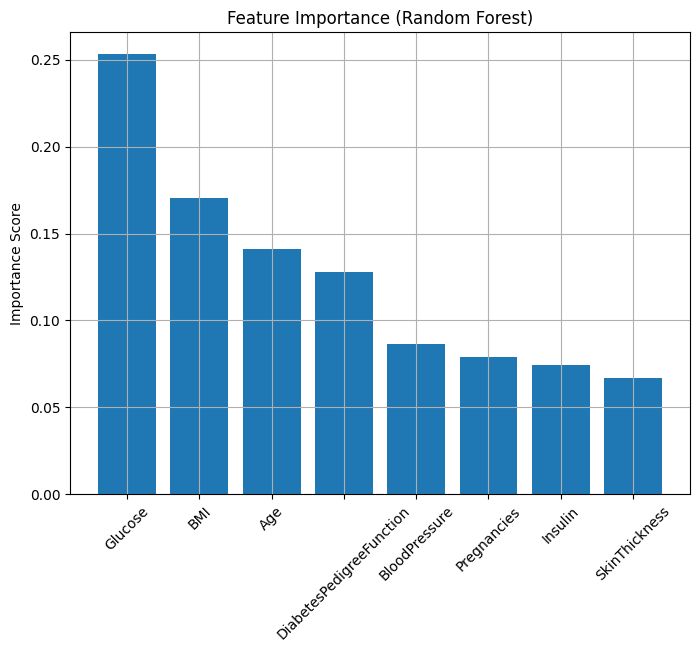

In [29]:
import pandas as pd

# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,6))
plt.bar(feat_df['Feature'], feat_df['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


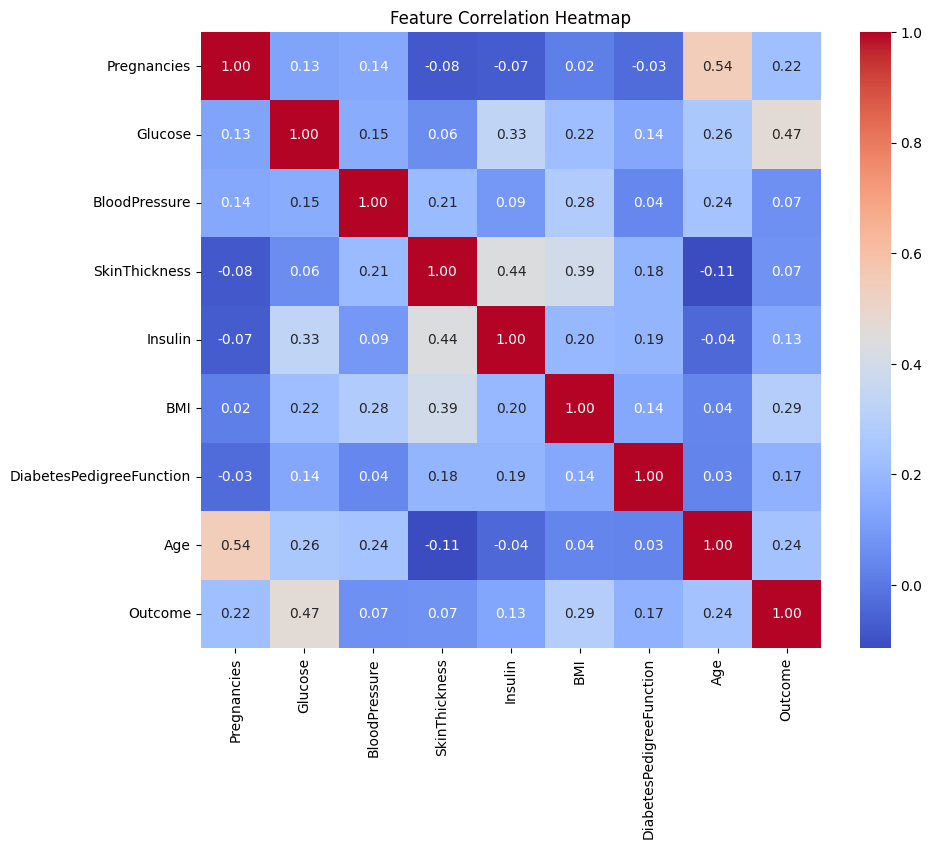

In [30]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [31]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76    

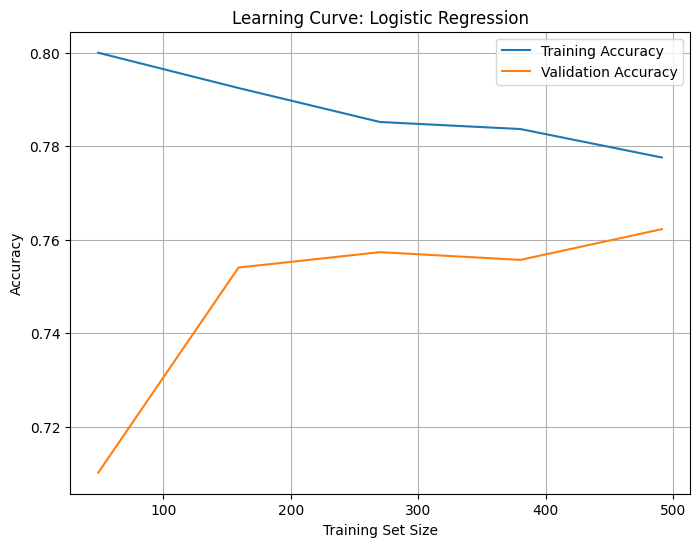

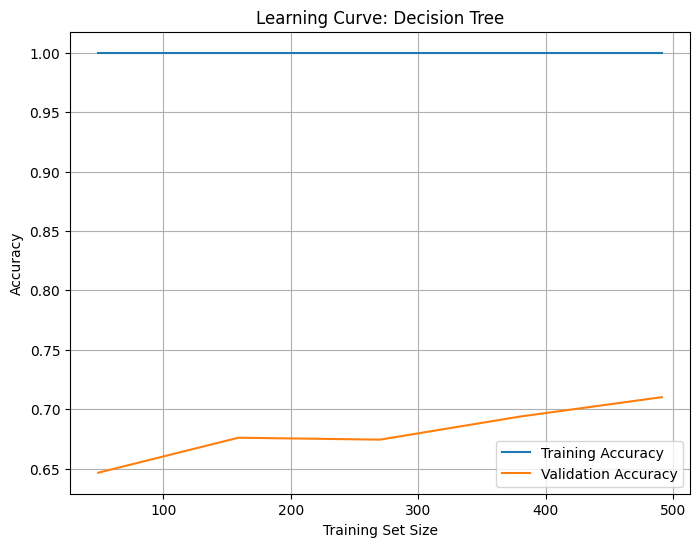

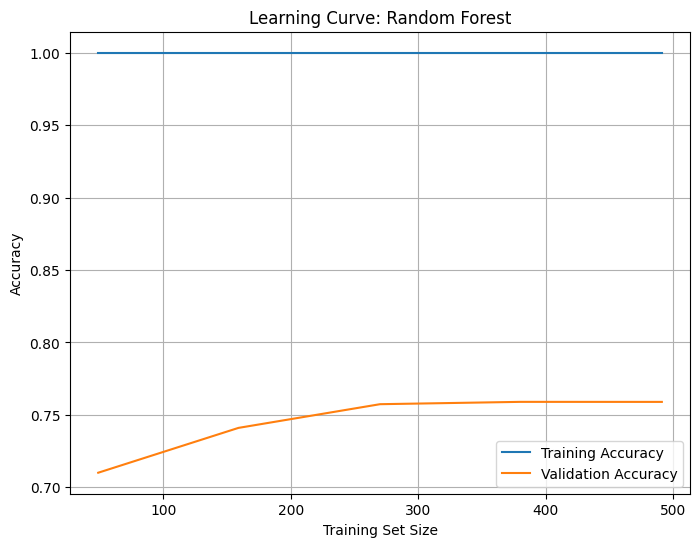

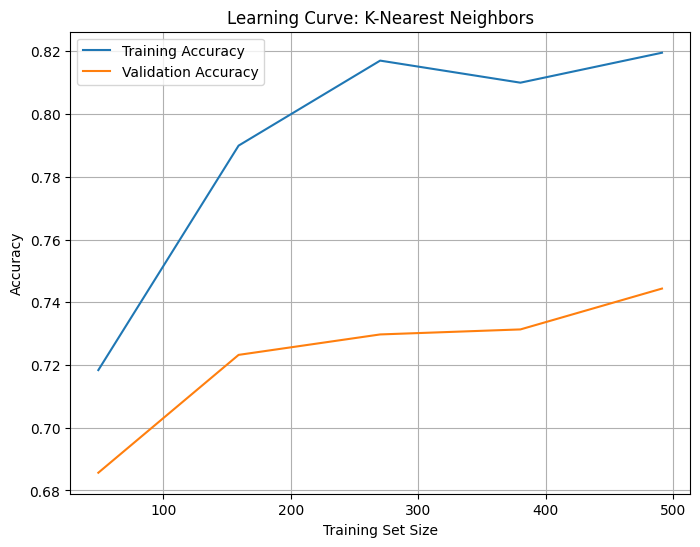

In [36]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model
}

for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy')
    plt.title(f'Learning Curve: {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [33]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} - CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


Logistic Regression - CV Accuracy: 0.7709 (+/- 0.0247)
Decision Tree - CV Accuracy: 0.7267 (+/- 0.0420)
Random Forest - CV Accuracy: 0.7631 (+/- 0.0396)
SVM - CV Accuracy: 0.7709 (+/- 0.0225)
K-Nearest Neighbors - CV Accuracy: 0.7331 (+/- 0.0201)


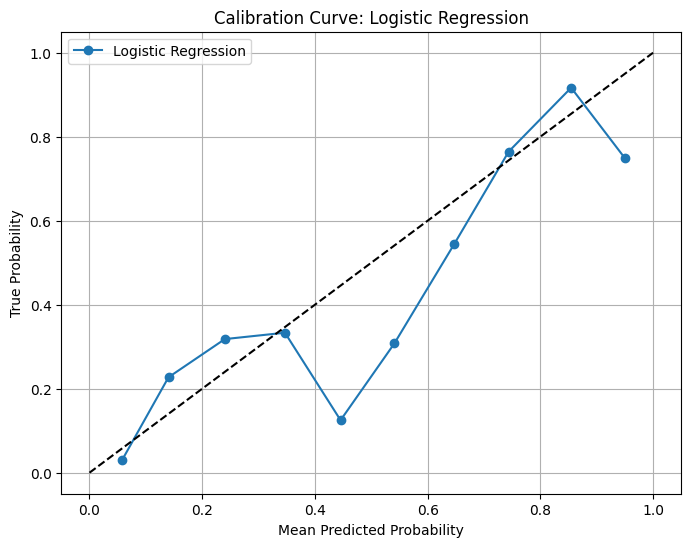

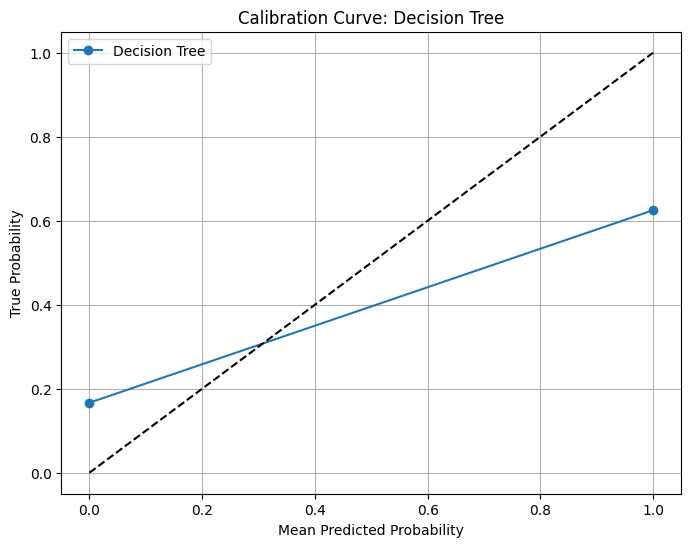

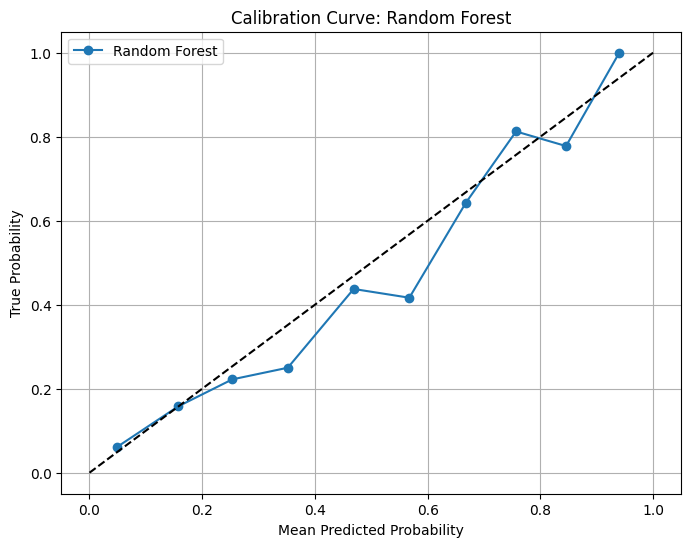

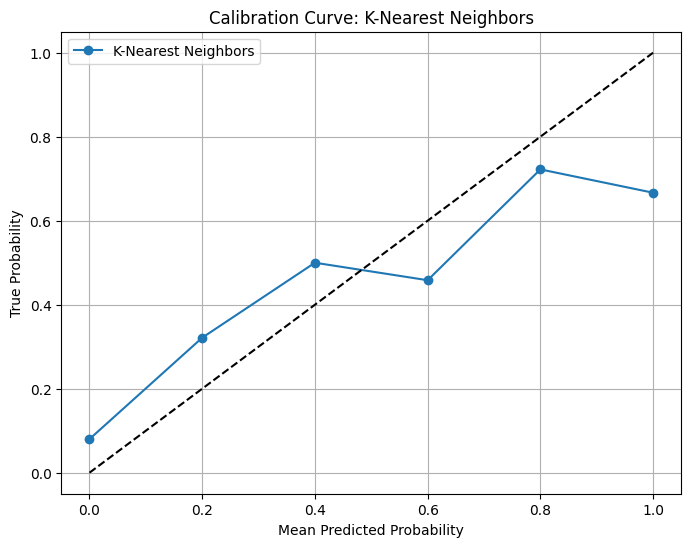

In [37]:
from sklearn.calibration import calibration_curve

for name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_prob = model.decision_function(X_test_scaled)

        prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

        plt.figure(figsize=(8, 6))
        plt.plot(prob_pred, prob_true, marker='o', label=name)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'Calibration Curve: {name}')
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('True Probability')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Calibration curve not available for {name}: {e}")


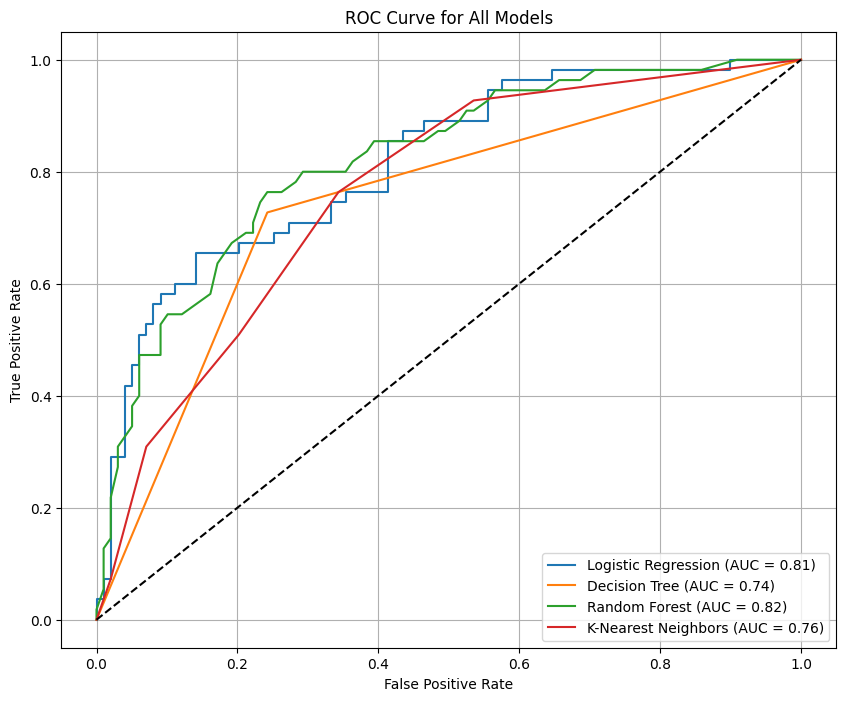

In [38]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_score = model.decision_function(X_test_scaled)

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    except Exception as e:
        print(f"ROC AUC not available for {name}: {e}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


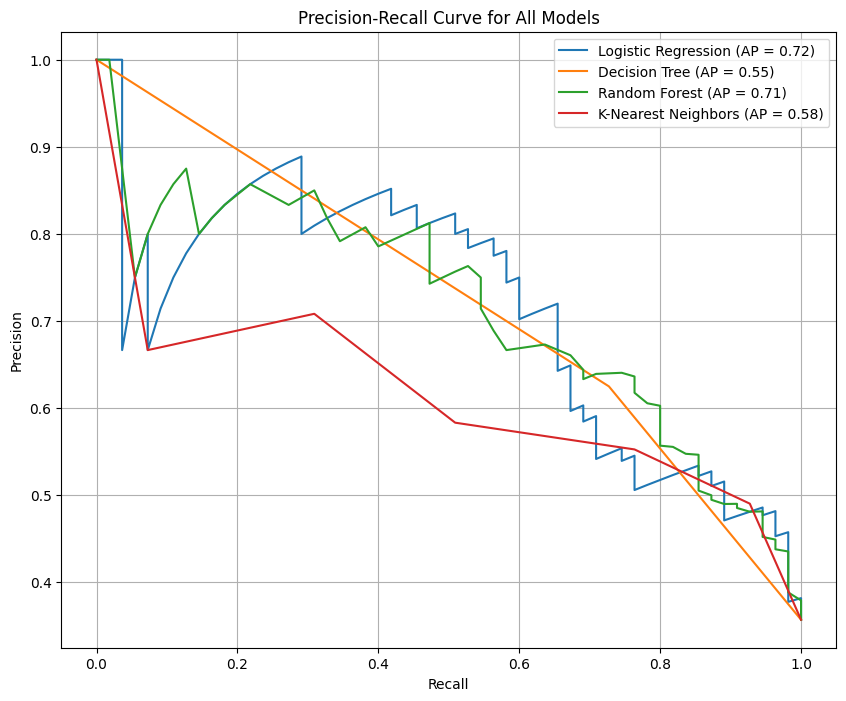

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_scores = model.decision_function(X_test_scaled)

        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        ap = average_precision_score(y_test, y_scores)
        plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})')

    except Exception as e:
        print(f"PR Curve not available for {name}: {e}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for All Models')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [40]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}')


Logistic Regression Cross-Validation Accuracy: 0.7606 ± 0.0299
Decision Tree Cross-Validation Accuracy: 0.7280 ± 0.0336
Random Forest Cross-Validation Accuracy: 0.7737 ± 0.0266
K-Nearest Neighbors Cross-Validation Accuracy: 0.7444 ± 0.0289


In [41]:
from sklearn.metrics import accuracy_score

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        'Accuracy': acc
    }

import pandas as pd
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("🔍 Final Testing Accuracy Table:")
display(results_df)


🔍 Final Testing Accuracy Table:


,Accuracy
Random Forest,0.759740
Logistic Regression,0.753247
Decision Tree,0.746753
K-Nearest Neighbors,0.694805
